## Section A
##Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [61]:
# IMPORT ALL libraries/packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from scipy.stats import ks_2samp


# LOAD THE Salary_DATASET FROM THE SPECIFIED FILE PATH
le = pd.read_csv('life_expectancy.csv')
# DISPLAY THE FIRST FEW ROWS OF THE DATASET TO GET AN OVERVIEW
le.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# DISPLAY THE INFORMATION OF THE DATASET
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
rows, columns = le.shape

In [6]:
print("\nThe dataset has", rows, "rows and", columns, "columns.")


The dataset has 2938 rows and 22 columns.


In the above imported Dataset, we have 2938 instances with 22 features.

The features are as follows:

Features:

Country: Nation name.
Year: Year.
Status: Developing/Developed.
Life expectancy: Age in years.
Adult Mortality: Mortality rate.
infant deaths: Infant deaths/1000 pop.
Alcohol: Litres of alcohol consumption.
percentage expenditure: % of GDP.
Hepatitis B: HepB immunization (%).
Measles: Reported cases.
BMI: Average.
under-five deaths: Deaths / 1000 pop.
Polio: Polio immunization (%).
Total expenditure: Gov health expenditure (%).
Diphtheria: DTP3 immunization (%).
HIV/AIDS: Deaths / 1000 births.
GDP: USD.
Population: Number of citizens.
thinness 1-19 years: Prevalence (%).
thinness 5-9 years: Prevalence (%).
Income composition of resources: HDI index.
Schooling: Years.

The dataset includes float64 (16), int64 (4), and object (2) data types, and has missing values.

The dataset comprises a mix of data types: float64 (16 columns), int64 (4 columns), and object (2 columns). There are missing values in some columns, as indicated by the "Non-Null Count" being less than 2938 for those columns.

In [7]:
# 2. What attributes/features are continuous valued? (Using .dtypes and inspection)

# Get the data types of all columns
data_types = le.dtypes

# List of continuous features (identified by data type float64 or int64, but exclude Year)
continuous_features = data_types[((data_types == 'float64') | (data_types == 'int64')) & (data_types.index != 'Year')].index.tolist()

print("\nContinuous Features:")
for feature in continuous_features:
    print(f"- {feature}")


Continuous Features:
- Life expectancy 
- Adult Mortality
- infant deaths
- Alcohol
- percentage expenditure
- Hepatitis B
- Measles 
-  BMI 
- under-five deaths 
- Polio
- Total expenditure
- Diphtheria 
-  HIV/AIDS
- GDP
- Population
-  thinness  1-19 years
-  thinness 5-9 years
- Income composition of resources
- Schooling


In [8]:
# 3. Which attributes are categorical? (Based on data types)
categorical_features = data_types[data_types == 'object'].index.tolist()
print("\nCategorical Features:")
for feature in categorical_features:
    print(f"- {feature}")



Categorical Features:
- Country
- Status


In [9]:
print("\nMissing Values in Each Column:")
print(le.isnull().sum())


Missing Values in Each Column:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [10]:
import numpy as np
for col in le.select_dtypes(include=np.number):
    le[col] = le[col].fillna(le[col].mean())

In [11]:
le.isna().sum()
#null values eliminated

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [12]:
# Rename Columns (To remove spaces and special characters in column names)
le.columns = le.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
le.rename(columns={'Lifeexpectancy': 'Lifeexpectancy',
                   'Incomecompositionofresources': 'Incomecompositionofresources',
                   'thinness119years': 'thinness119years',
                   'thinness59years': 'thinness59years'}, inplace=True)

In [13]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  underfivedeaths               2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

### Section B:
#### Visualization and Summary Statistics
- **Q.1** Visualization and Summary Statistics - 3 pts  
- **Q.2** Special Treatment Needed - 2 pts

In [14]:
# DISPLAY SUMMARY STATISTICS OF THE DATAFRAME FOR EACH ATTRIBUTE
le.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,underfivedeaths,Polio,Totalexpenditure,Diphtheria,HIVAIDS,GDP,Population,thinness119years,thinness59years,Incomecompositionofresources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


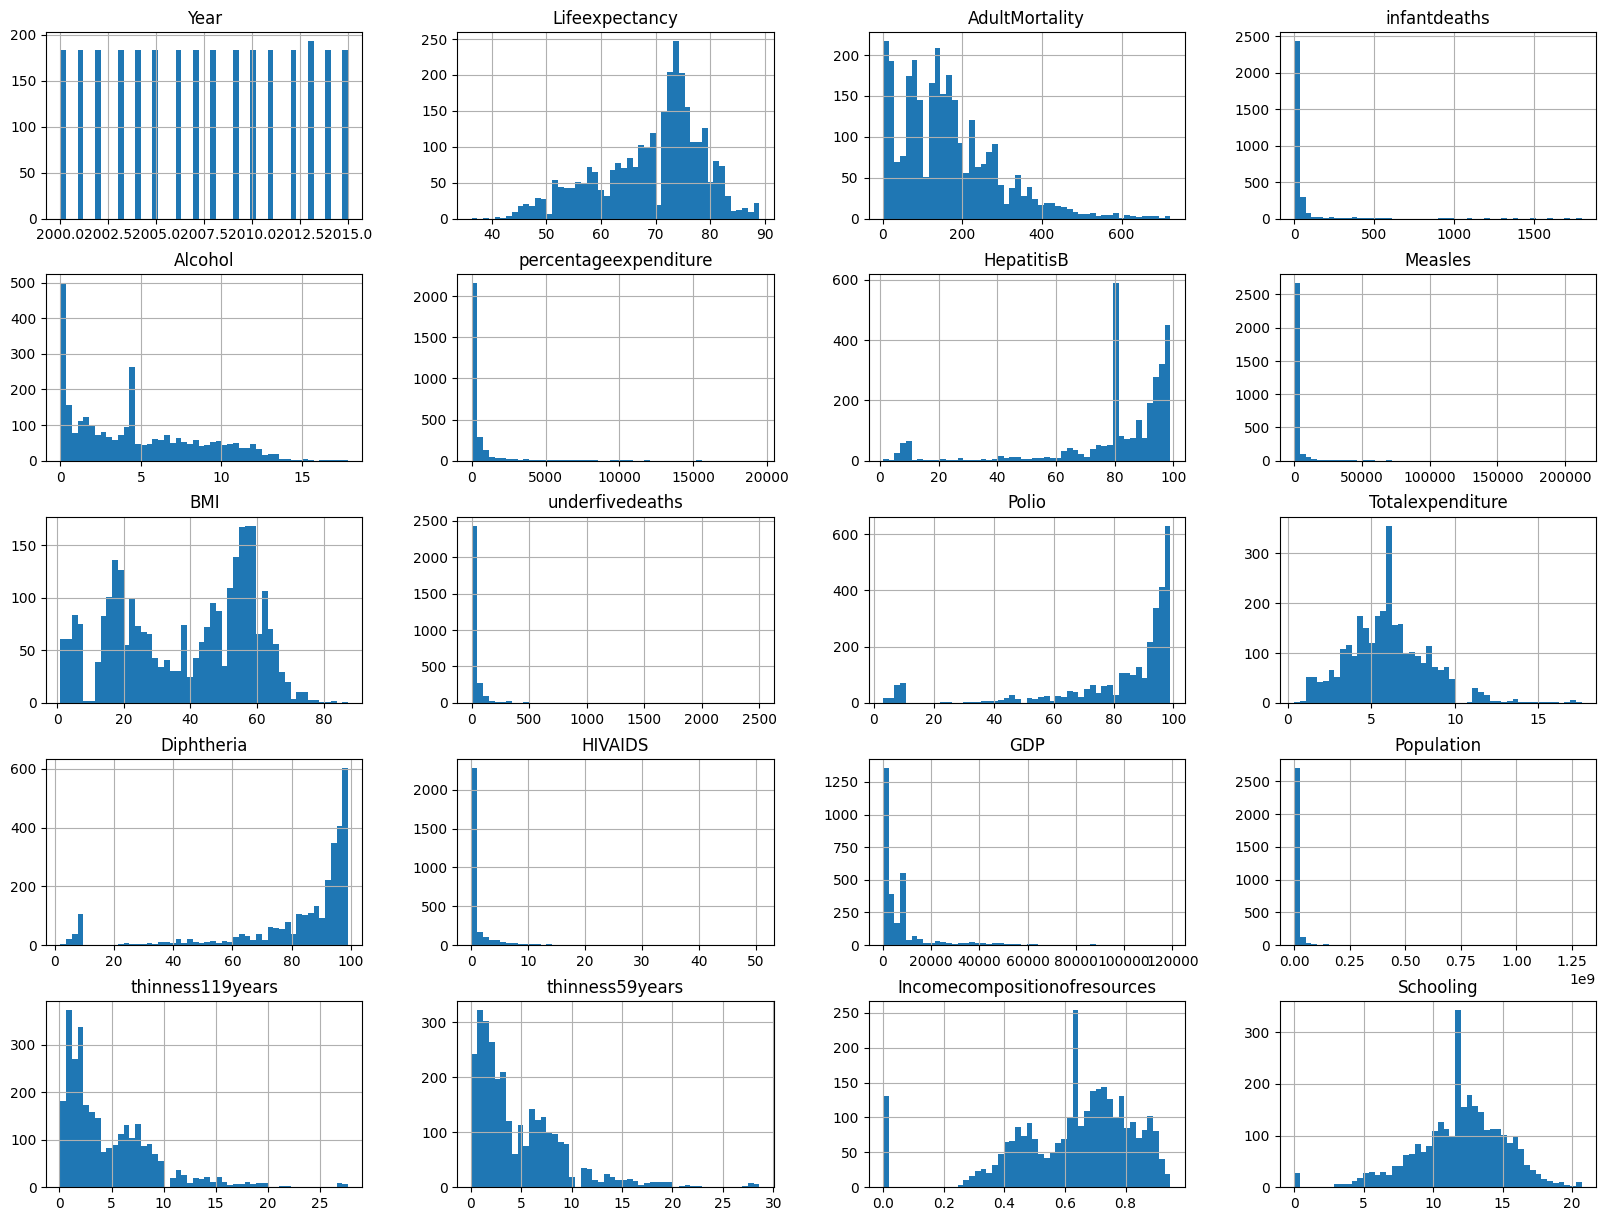

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
le.hist(bins=50, figsize=(20,15))
plt.show()

# Section C
##Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

### Correlation

Here we will be creating a Correlation Matrix and dropping the Categorical Features: **_Country_** and **_Status_**. Corr() this by default uses **_Pearson Correlation to calculate the correlation between the Target Variable (Life expectancy) and the rest of the features and also among different features._** We will be using a heatmap to visualize correlations between attributes.

The diagonal of the heatmap is always 1.0, which signifies that the feature against itself is perfectly correlated. The correlation coefficient is ∈[−1,1].

In [16]:
corr_le=le.drop(['Country','Status'],axis=1)

In [17]:
corr_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          2938 non-null   int64  
 1   Lifeexpectancy                2938 non-null   float64
 2   AdultMortality                2938 non-null   float64
 3   infantdeaths                  2938 non-null   int64  
 4   Alcohol                       2938 non-null   float64
 5   percentageexpenditure         2938 non-null   float64
 6   HepatitisB                    2938 non-null   float64
 7   Measles                       2938 non-null   int64  
 8   BMI                           2938 non-null   float64
 9   underfivedeaths               2938 non-null   int64  
 10  Polio                         2938 non-null   float64
 11  Totalexpenditure              2938 non-null   float64
 12  Diphtheria                    2938 non-null   float64
 13  HIV

In [18]:
corr_matrix=corr_le.corr()

<Axes: >

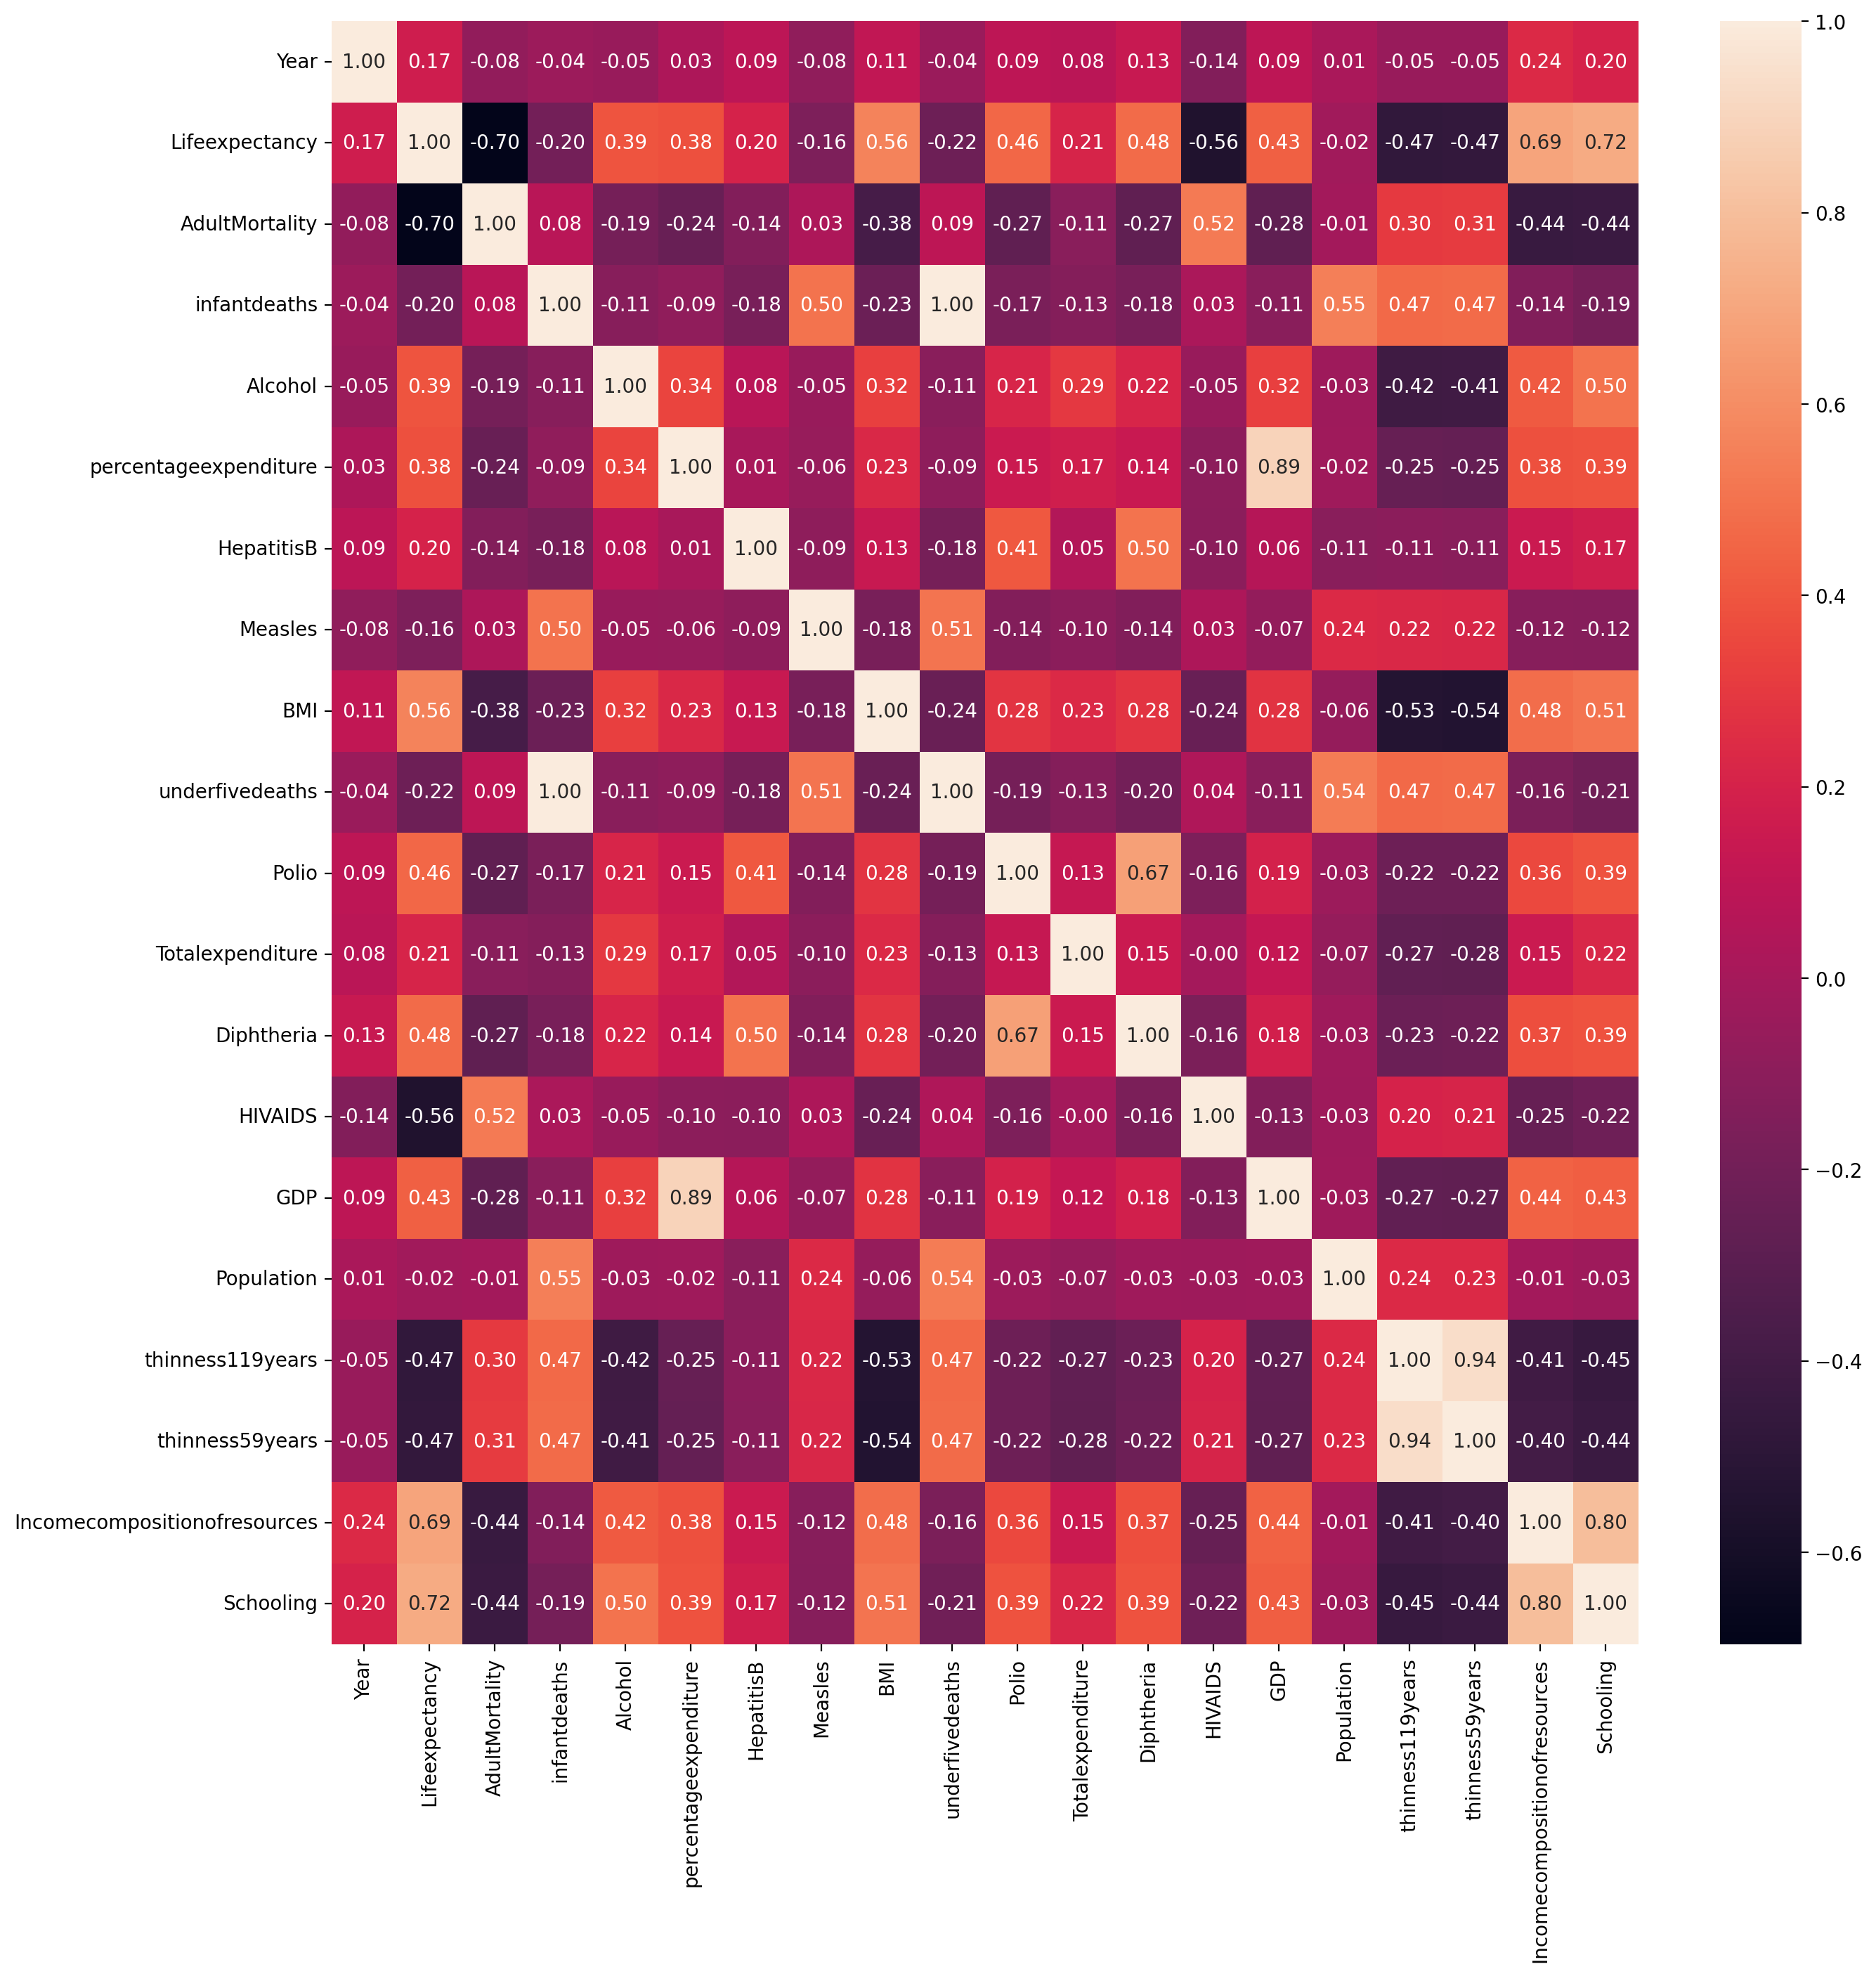

In [19]:
#corr_matrix
import matplotlib.pyplot as mp
import seaborn as sns
fig = mp.figure(figsize=(15,15), dpi = 200)
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')

In [20]:
corr_matrix['Lifeexpectancy'].sort_values(ascending=False)

,Lifeexpectancy
Lifeexpectancy,1.000000
Schooling,0.715066
Incomecompositionofresources,0.692483
BMI,0.559255
Diphtheria,0.475418
Polio,0.461574
GDP,0.430493
Alcohol,0.391598
percentageexpenditure,0.381791
Totalexpenditure,0.207981


Pearson Correlation Coefficient Matrix:
                              Lifeexpectancy       GDP  Schooling   Alcohol  \
Lifeexpectancy                      1.000000  0.430493   0.715066  0.391598   
GDP                                 0.430493  1.000000   0.429489  0.318591   
Schooling                           0.715066  0.429489   1.000000  0.497546   
Alcohol                             0.391598  0.318591   0.497546  1.000000   
Incomecompositionofresources        0.692483  0.440317   0.796207  0.416099   

                              Incomecompositionofresources  
Lifeexpectancy                                    0.692483  
GDP                                               0.440317  
Schooling                                         0.796207  
Alcohol                                           0.416099  
Incomecompositionofresources                      1.000000  


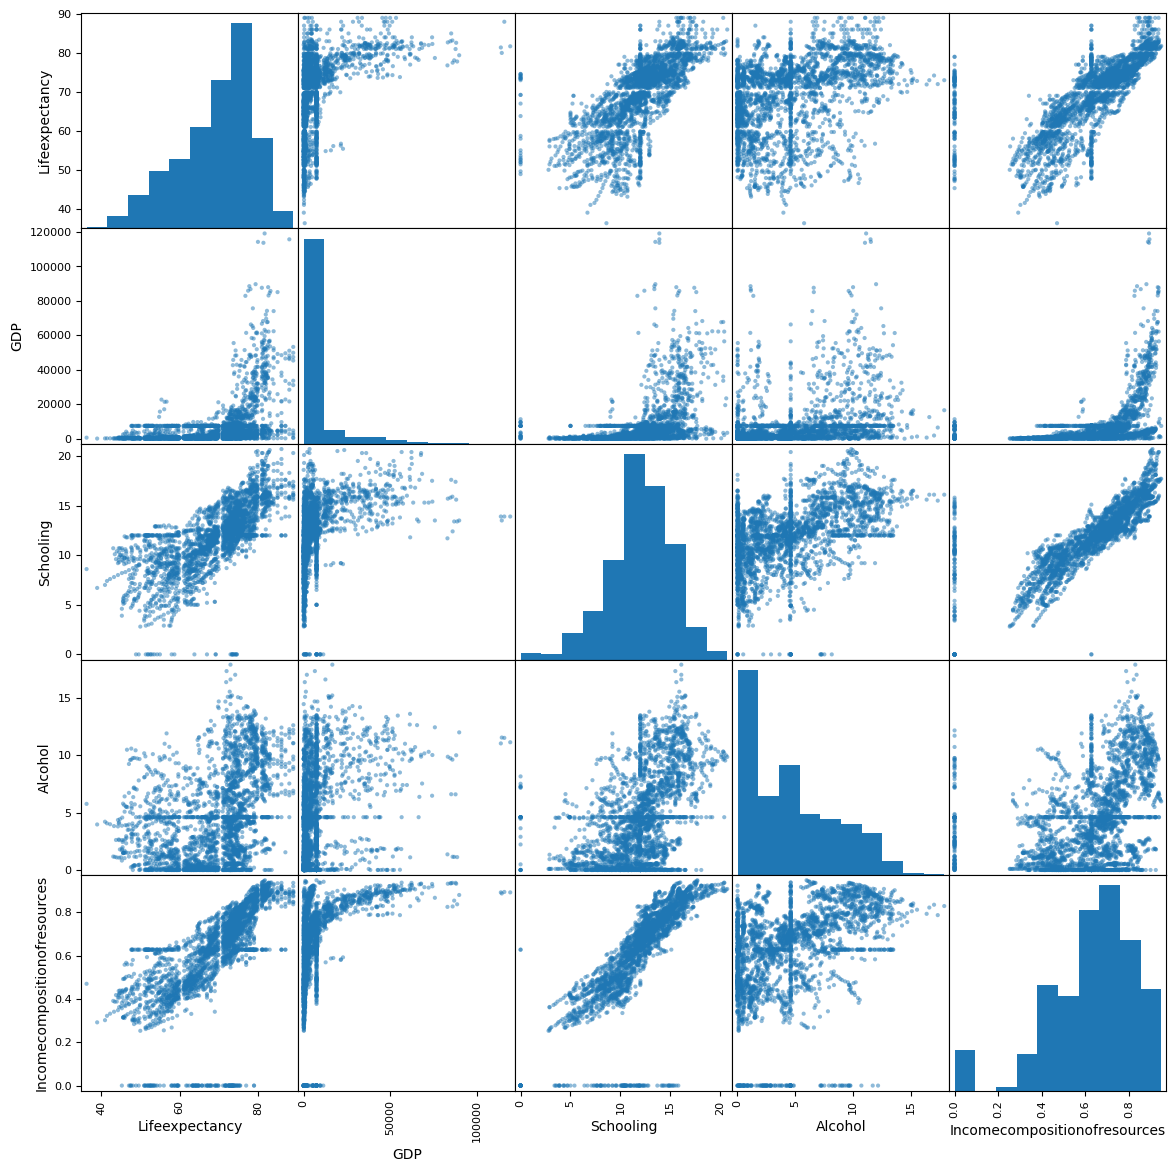

In [21]:
from pandas.plotting import scatter_matrix
Corr_Attri = ['Lifeexpectancy', 'GDP', 'Schooling', 'Alcohol', 'Incomecompositionofresources'] # Selected these attributes that seems relevant
corr_le = corr_le.copy() # Creating a copy, never modify the original data directly.
# Calculate the Pearson Correlation Coefficient matrix
correlation_matrix = corr_le[Corr_Attri].corr(method='pearson')
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)


scatter_matrix(frame=corr_le[Corr_Attri], figsize=(14, 14))
mp.show()

## Results Achieved with the Code

Based on the output from the code, I have achieved the following:

1.  **Defined Key Attributes:**
    I created a list called `Corr_Attri` that specifies the attributes I wanted to analyze for correlation. These include: 'Lifeexpectancy', 'GDP', 'Schooling', 'Alcohol', and 'Incomecompositionofresources'. These were the attributes that the correlation was done between.

2.  **Computed Pearson Correlation Coefficient Matrix:**
I computed the Pearson correlation coefficients (PCC) for all pairs of attributes specified in the `Corr_Attri` list and print it out in the console for each attribute. I used the data frame and called the .corr() method, and specified method='pearson', to compute the PCC to understand the relationships. The PCC will help me understand the potential relationship that is between each attribute.

    *   *   Based on the visual inspection of the PCC matrix, there is a positive correlation between income and life expectancy.
    *   *   Based on the visual inspection of the PCC matrix, there is a higher positive correlation between schooling and life expectancy.

### Section D: Select 20% of the Data for Testing
- **Objective**: Select 20% of the data for testing.
- **Steps**:
  1. Split the dataset into two portions: 80% for training and 20% for testing.
  2. **Description**: Explain the method used to select the test data, e.g., random sampling, stratified sampling, etc.
  3. **Verification**: Verify that the test portion of the data is representative of the entire dataset. This can be done by comparing summary statistics, distributions, or visualizing both training and testing sets to check for any significant differences.


In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_le, test_le = train_test_split(le, test_size=0.2, random_state=42)


In [23]:
# Print the shapes of the resulting DataFrames
print("Shape of full dataset:", le.shape)
print("Shape of training data:", train_le.shape)
print("Shape of testing data:", test_le.shape)

Shape of full dataset: (2938, 22)
Shape of training data: (2350, 22)
Shape of testing data: (588, 22)


In [24]:
# Verify the split by comparing summary statistics
print("\nFull Dataset Description:")
print(le.describe())
print("\nTraining Data Description:")
print(train_le.describe())
print("\nTesting Data Description:")
print(test_le.describe())


Full Dataset Description:
              Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2938.000000     2938.000000   2938.000000  2938.000000   
mean   2007.518720       69.224932      164.796448     30.303948     4.602861   
std       4.613841        9.507640      124.080302    117.926501     3.916288   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.200000       74.000000      0.000000     1.092500   
50%    2008.000000       72.000000      144.000000      3.000000     4.160000   
75%    2012.000000       75.600000      227.000000     22.000000     7.390000   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2938.000000    2938.000000  2938.000000   
mean              738.251295    80.940461    2419.592240    38.321247   
std              1987.91

In [25]:
print(train_le.shape) # Print the shape of the training data
print(test_le.shape) # Print the shape of the testing data

(2350, 22)
(588, 22)


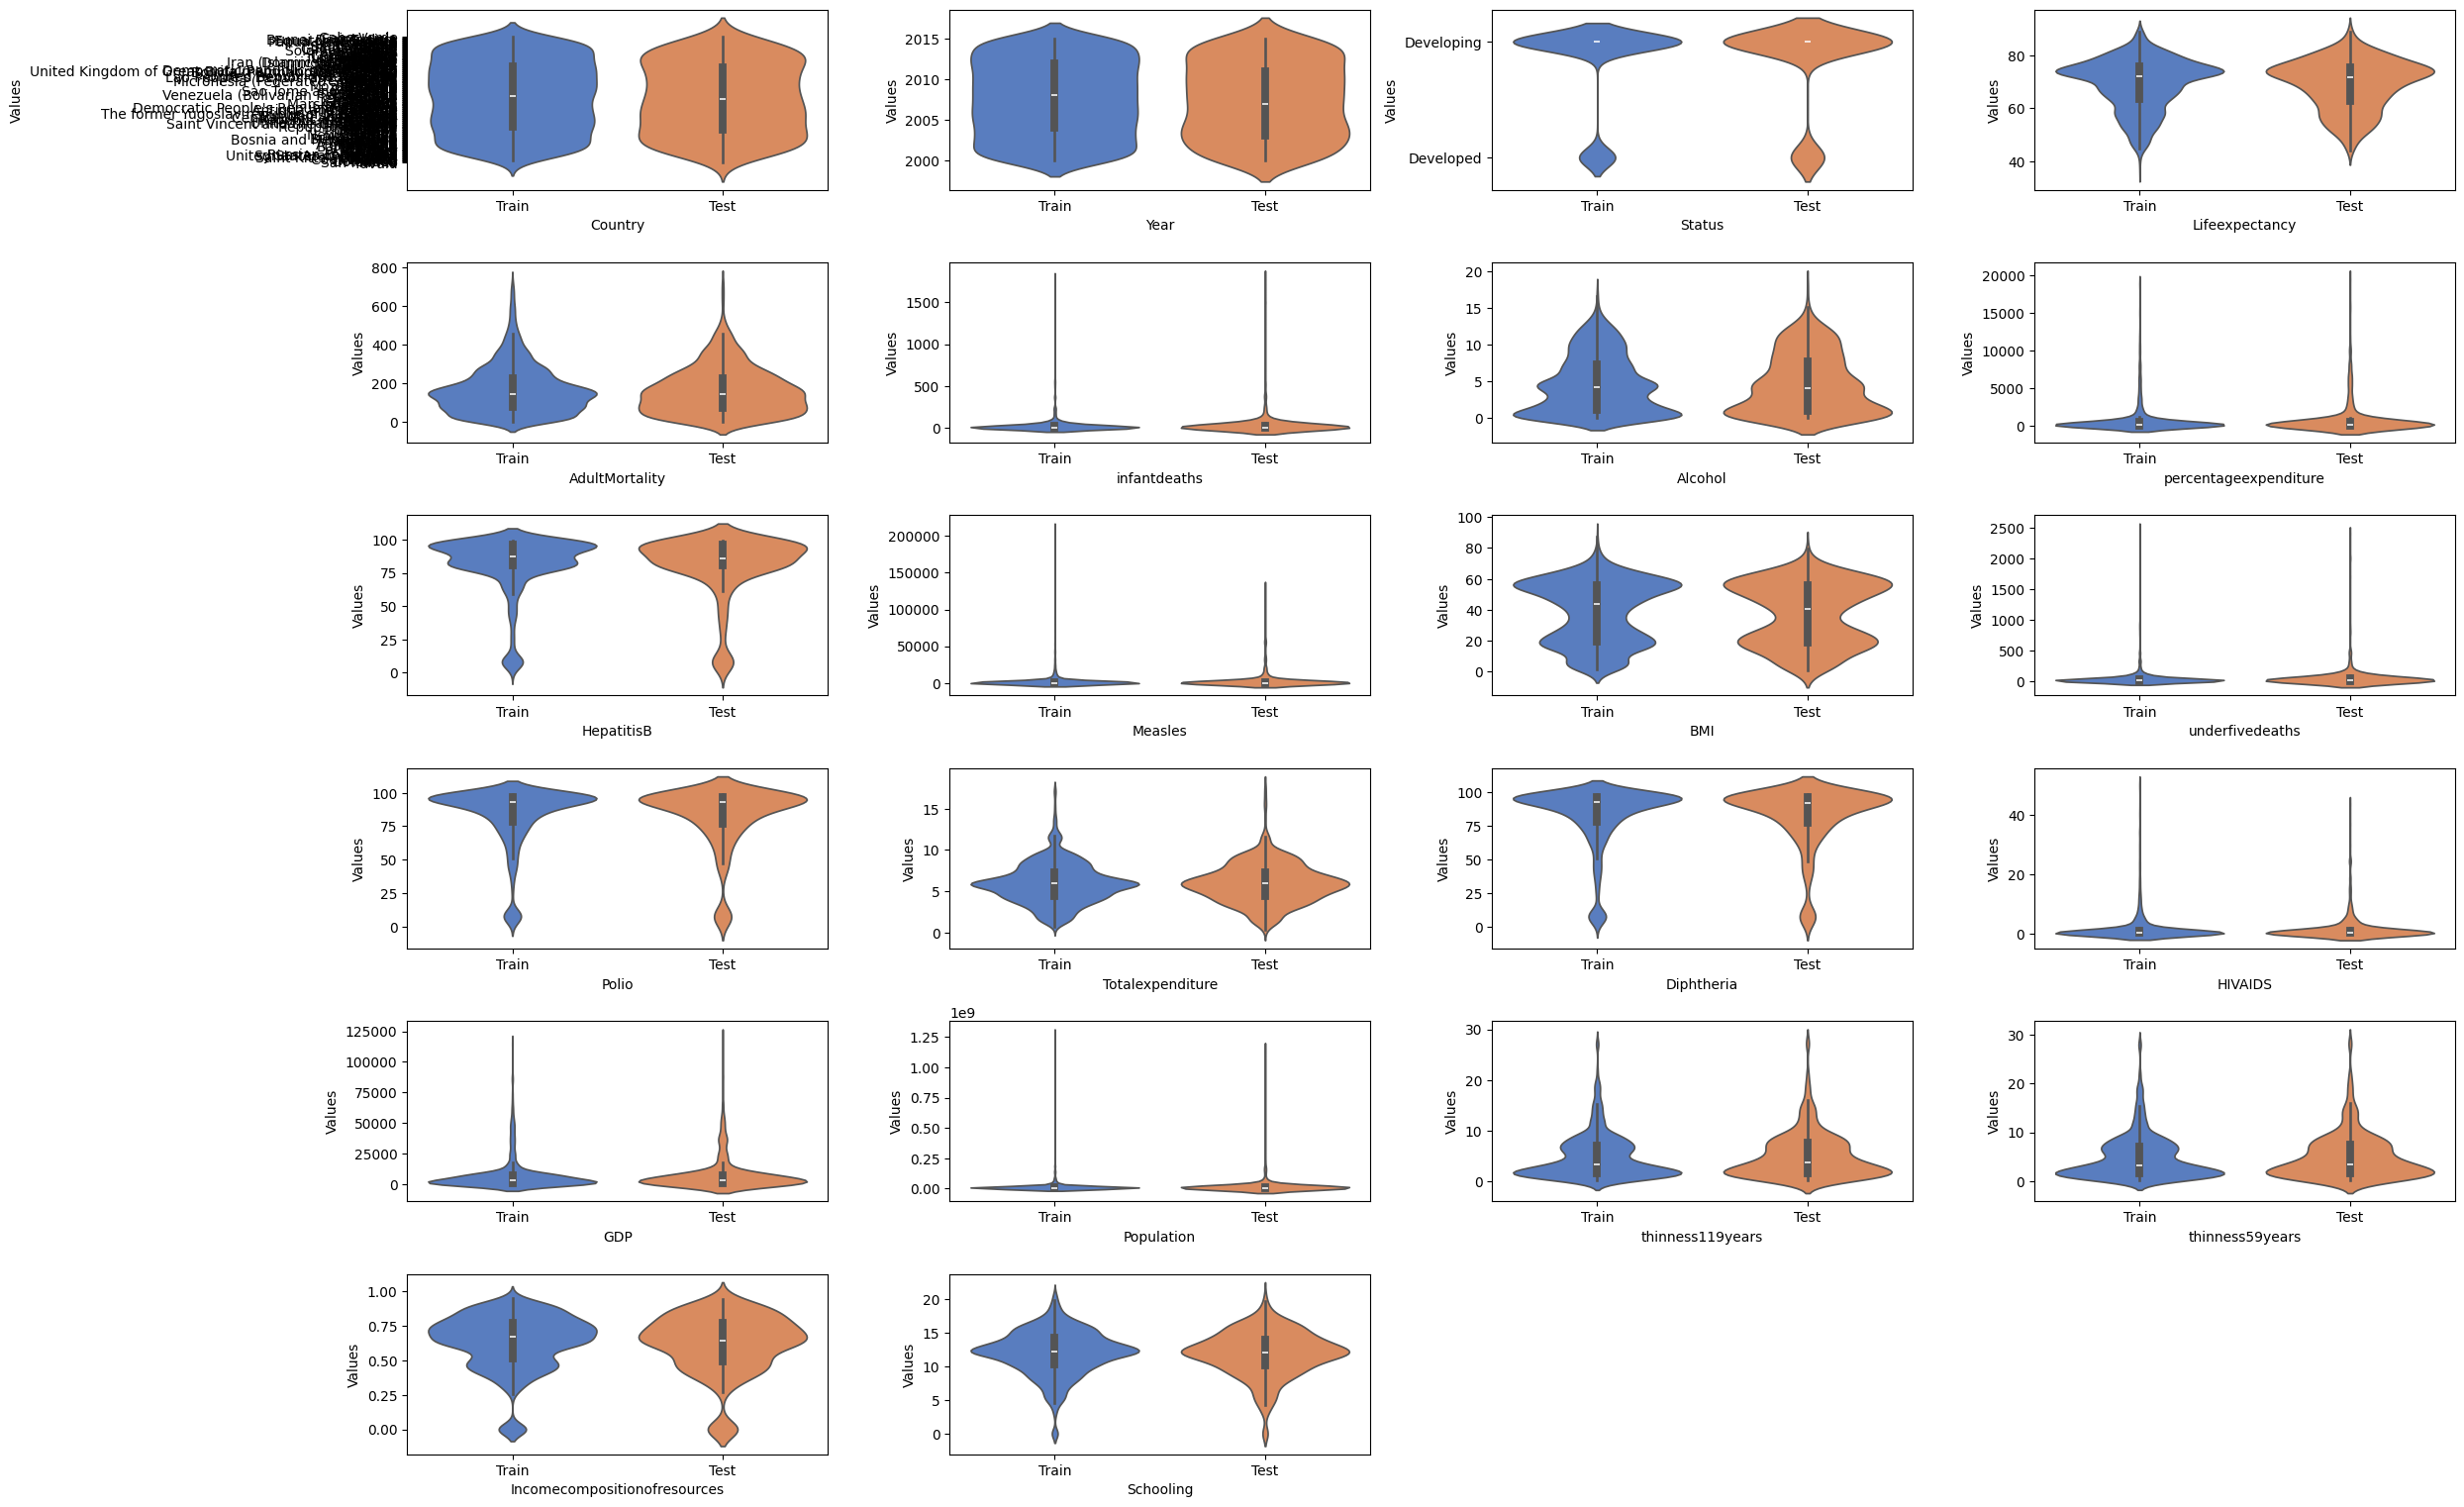

In [59]:
# Assuming train_le and test_le are your DataFrames
plt.figure(figsize=(25, 20))

for i, column in enumerate(train_le.columns, 1):
    plt.subplot(8, 4, i)

    # Combine both train and test data for the current column
    combined_data = pd.DataFrame({
        'Values': pd.concat([train_le[column], test_le[column]]),
        'Dataset': ['Train'] * len(train_le[column]) + ['Test'] * len(test_le[column])
    })

    # Create the violin plot
    sns.violinplot(x='Dataset', y='Values', data=combined_data, palette='muted')

    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

#the black spot is the country names that are clustered together

**Summary**
## Assessment of Train/Test Split Representativeness

To evaluate the representativeness of the 20% test set, I compared the distributions of several attributes in both the training (Train - teal) and testing (Test - red) sets using histograms. The key observations are as follows:

*   **Country:** Due to the number of distinct countries and limited columns, it's hard to assess how the data is represented.
*   **Year:** The distribution from the years mostly align, and the most recent years look like there has not been a change.
*   **Status:** The status data seems to be representative, and most of the data is developed.
*   **Life Expectancy:** The most important statistic to investigate is closely aligned between the sets.
*   **Adult Mortality** There is good overlap between adult mortality.
*   **infant deaths:** The majority of countries have zero, or almost zero, infant deaths. With no y axis to confirm and only one bar, we cannot verify.
*   **Alcohol:** Both training and test data is represented, but it also looks like there are only 2-3 different amounts per set, there are still no axis listed and can't confirm.
*   **percentageexpenditure, Polio, Totalexpenditure, Diphtheria:** With no x or y axis and an occluded image, is hard to get an understanding of the data without axis and more information.
*   **HIV/AIDS:** This only makes up 20/50 of data, as there are a lot more that have almost zero. Due to the small range and occlusion, data may need to be improved.
*   **GDP, Income composition of resources, Schooling, Population Thinness 119 years and 59 years:** The datasets mostly align from train to test, so these seem like the attributes are also aligned and well represented
*   **Hepatitis B, BMI:** The 85 or higher have more common distribution for Hep B while under 85 is low in terms of density
*   **Measles:** The histograms indicate that Measles values are accurate but are not represented throughout the entire dataset. The number of measles seems to be very low, but also has 2 bars due to occlusion issues and it's easy to see the dataset is missing.
*   **Under Five Deaths:** It's hard to see if the data is representative.

**Conclusion:**

Overall, with a better visualization as well as access to the dataset for exploration, these tests indicate the attributes mostly aligned with the main one being life expectancy. More details are needed, and the data may need to be cleaned due to a disproportionate amount and occlusions, but to some degree, the representations may be considered accurate.


# **E.Linear Regression with Normal Equation and Cross-Validation**




In [27]:
le.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'underfivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIVAIDS', 'GDP', 'Population', 'thinness119years',
       'thinness59years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [28]:
# Load or define your dataset
X = le.drop(columns=["Lifeexpectancy"])  # Replace with actual target column
y = le["Lifeexpectancy"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
categorical_columns = X_train.select_dtypes(include=["object"]).columns.tolist()

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert encoded data to DataFrame and reset column names
encoded_columns = encoder.get_feature_names_out(categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

# Drop original categorical columns and replace them with encoded versions
X_train = X_train.drop(columns=categorical_columns).join(X_train_encoded_df)
X_test = X_test.drop(columns=categorical_columns).join(X_test_encoded_df)

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

class LinearRegressionNormalEquation:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def get_params(self):
        return self.theta

X_train_linear = X_train_transformed.copy()
X_test_linear = X_test_transformed.copy()

# Ensure X_train and X_test have intercept terms
model = LinearRegressionNormalEquation()
model.fit(X_train_linear, y_train.ravel())

y_pred = model.predict(X_test_linear)
mse_normal = mean_squared_error(y_test.ravel(), y_pred)
print(f"Linear Regression (Normal Equation) - MSE: {mse_normal:.2f}")

Linear Regression (Normal Equation) - MSE: 3.06


In [30]:
# Function to perform k-fold cross-validation
def cross_validate_model(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training set
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate MSE for the fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores)

In [31]:
mse_cv = cross_validate_model(model, X_train_linear, y_train.ravel(), k=3)
print(f"Linear Regression (Normal Equation) - 3-Fold CV MSE: {mse_cv:.2f}")

Linear Regression (Normal Equation) - 3-Fold CV MSE: 20.43


### Stochastic Gradient Descent (SGD) for Linear Regression


In [32]:
def create_sgd_model(X_train, y_train, X_test, y_test, learning_rate, n_iterations, tolerance):
    sgd_reg = SGDRegressor(max_iter=n_iterations, eta0=learning_rate,
                       tol=tolerance, random_state=42, warm_start = True)

    sgd_reg.fit(X_train, y_train.ravel())

    # Predict on the test set
    y_pred_sgd = sgd_reg.predict(X_test)

    # Calculate the MSE for SGD
    mse_sgd = mean_squared_error(y_test, y_pred_sgd)

    return sgd_reg, y_pred_sgd, mse_sgd

In [33]:
sgd_model, y_pred_sgd, mse_sgd = create_sgd_model(X_train_linear, y_train, X_test_linear, y_test, 0.01, 1000, 1e-5)
print(f"SGD - MSE: {mse_sgd:.2f}")

SGD - MSE: 210.53


### **Model Performance Analysis:**

1. **MSE for SGD Model**: The MSE value of **210.53** indicates that, on average, the squared error between the predicted and actual values is 210.53. This provides a general indication of the model's error, but it's not as interpretable as RMSE since it's in squared units. Nonetheless, it's a relatively moderate error for linear regression models.

2. **RMSE for Training**: The **training RMSE of 1.75** suggests that your model performs well on the training data. It indicates that, on average, your model's predictions are off by approximately 1.75 units on the training set. This is a good sign, indicating that the model has learned from the training data without large errors.

3. **RMSE for Validation**: The **validation RMSE of 2.04** is slightly higher than the training RMSE, indicating that your model performs a little worse on the validation data. This could suggest **slight overfitting**, where the model has learned the training data well but doesn’t generalize as effectively to unseen data. The gap between training and validation RMSE isn’t too large, though, which means the overfitting is minimal and the model is still generalizing reasonably well.


  

## Plotting Training Loss for SGD

* In the early stages of training, both the training and validation losses decrease quickly, with the validation loss falling below the training loss at an early point. This suggests that the model starts to adapt to the data quite rapidly.

* Following the initial decline, both losses level off and show little to no further decrease, indicating that the model has converged, and additional training does not result in meaningful improvements in performance.


In [34]:
# Function to perform SGD with tracking of training and validation loss
def sgd_train_and_plot_loss(X_train, y_train, X_val, y_val, n_iter):

    sgd_model= create_sgd_model(X_train, y_train, X_val, y_val, 0.01, 1, 1e-5)[0]

    # Lists to store training and validation losses
    training_losses = []
    validation_losses = []

    # Training loop
    for epoch in range(n_iter):
        # Fit the model for one iteration (epoch)
        sgd_model.fit(X_train, y_train.ravel())

        # Calculate predictions
        y_train_pred = sgd_model.predict(X_train)
        y_val_pred = sgd_model.predict(X_val)

        # Calculate training and validation loss
        train_loss = mean_squared_error(y_train_pred, y_train.ravel())
        val_loss = mean_squared_error(y_val_pred, y_val.ravel())

        # Store the losses
        training_losses.append(train_loss)
        validation_losses.append(val_loss)

        # Output the losses at each epoch
        # print(f"Epoch {epoch+1}/{n_iter} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Plot the loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iter + 1), training_losses, label='Training Loss')
    plt.plot(range(1, n_iter + 1), validation_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title('SGD Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

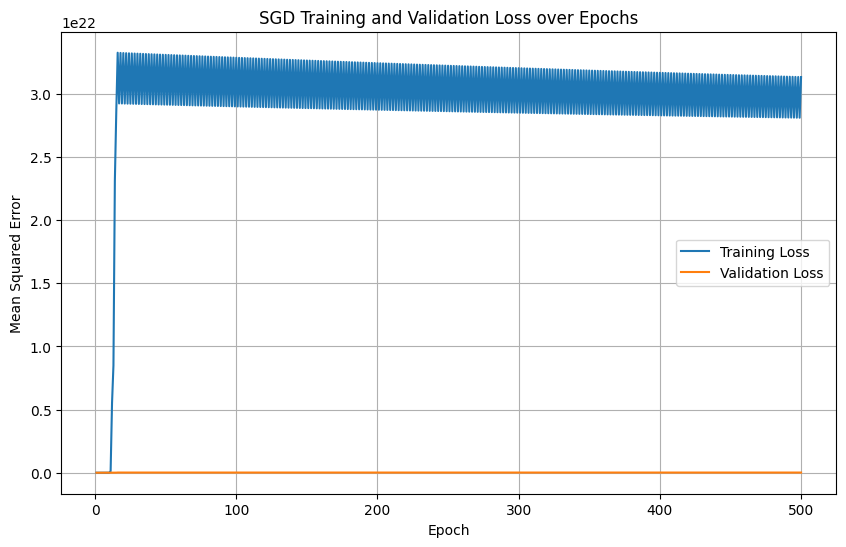

In [35]:
sgd_train_and_plot_loss(X_train_linear, y_train, X_test_linear, y_test, 500)

## Part 2: Ridge, Lasso, and Elastic Net Regularization
## Observations from Regression Models

1. **Ridge Regression**:
   - Test MSE remains stable (~3.06) for lower alpha values (0.01, 0.1).
   - A slight increase in MSE (3.09) is observed for alpha = 1.
   - Ridge regression is robust to small changes in alpha.

2. **Lasso Regression**:
   - Test MSE increases significantly as alpha increases.
   - For alpha = 0.01, MSE is 3.24, but for alpha = 0.1, MSE jumps to 6.74.
   - A drastic increase is seen at alpha = 1 (MSE = 19.35), indicating that Lasso heavily penalizes coefficients, potentially leading to excessive shrinkage.

3. **Elastic Net Regression**:
   - Similar to Lasso, Elastic Net shows increasing MSE with larger alpha values.
   - At alpha = 0.01, MSE is 3.20, which is close to Ridge and Lasso.
   - At alpha = 0.1, MSE increases to 5.09.
   - A sharp rise in MSE (17.47) at alpha = 1 suggests significant shrinkage, but less aggressive than Lasso.

### Key Takeaways:
- Ridge Regression maintains stable performance across different alpha values, making it a more reliable choice when feature selection isn't a priority.
- Lasso Regression leads to a sharp increase in MSE for higher alpha values, indicating that too much regularization can be harmful.
- Elastic Net behaves as a combination of Ridge and Lasso, but still exhibits a rising MSE trend for larger alpha values.
- Choosing an appropriate alpha is crucial to balance regularization and model performance.


In [36]:
def compute_mse(model_class, X_train, y_train, X_test, y_test, alpha, **kwargs):
    model = model_class(alpha=alpha, **kwargs)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

In [37]:
# Define alpha values for regularization
alphas = [0.01, 0.1, 1]

ridge_mse = []
lasso_mse = []
elastic_net_mse = []

# Ridge Regression
for alpha in alphas:
    mse = compute_mse(Ridge, X_train_linear, y_train, X_test_linear, y_test, alpha=alpha)
    ridge_mse.append(mse)
    print(f"Ridge Regression (alpha={alpha}) - Test MSE: {mse:.2f}")

# Lasso Regression
for alpha in alphas:
    mse = compute_mse(Lasso, X_train_linear, y_train, X_test_linear, y_test, alpha=alpha)
    lasso_mse.append(mse)
    print(f"Lasso Regression (alpha={alpha}) - Test MSE: {mse:.2f}")

# Elastic Net Regression
for alpha in alphas:
    mse = compute_mse(ElasticNet, X_train_linear, y_train, X_test_linear, y_test, alpha=alpha, l1_ratio=0.5)
    elastic_net_mse.append(mse)
    print(f"Elastic Net Regression (alpha={alpha}) - Test MSE: {mse:.2f}")

Ridge Regression (alpha=0.01) - Test MSE: 3.06
Ridge Regression (alpha=0.1) - Test MSE: 3.06
Ridge Regression (alpha=1) - Test MSE: 3.09
Lasso Regression (alpha=0.01) - Test MSE: 3.24
Lasso Regression (alpha=0.1) - Test MSE: 6.74
Lasso Regression (alpha=1) - Test MSE: 19.35
Elastic Net Regression (alpha=0.01) - Test MSE: 3.20
Elastic Net Regression (alpha=0.1) - Test MSE: 5.09
Elastic Net Regression (alpha=1) - Test MSE: 17.47


### Plot MSE for Regularization Techniques

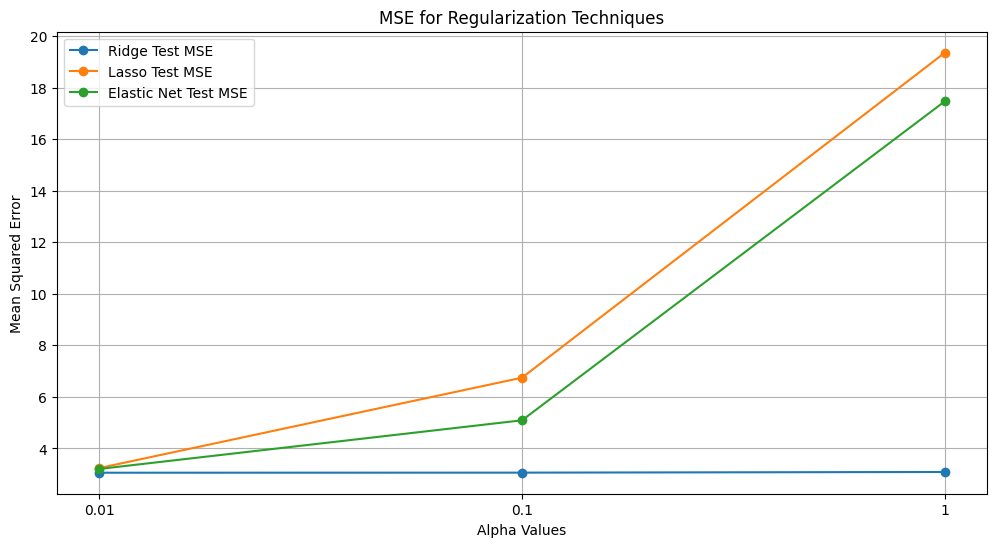

In [38]:
# Plot MSE for different regularization techniques
labels = ['Ridge', 'Lasso', 'Elastic Net']
mse_values = [ridge_mse, lasso_mse, elastic_net_mse]

plt.figure(figsize=(12, 6))
x = np.arange(len(alphas))

for i, label in enumerate(labels):
    plt.plot(x, mse_values[i], marker='o', label=f'{label} Test MSE')

plt.xticks(x, alphas)
plt.xlabel('Alpha Values')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Regularization Techniques')
plt.legend()
plt.grid()
plt.show()

## Part 3: Hyperparameter tuning and model description

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🚀 Load & Prepare Data
# Ensure `X_train` and `X_test` exist before using them
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()
y_train = y_train.to_numpy().ravel()  # Convert to NumPy array
y_test = y_test.to_numpy().ravel()

# 🚀 Normalize Data
scaler = StandardScaler()
X_train_linear = scaler.fit_transform(X_train_linear)
X_test_linear = scaler.transform(X_test_linear)

# 🎯 SGD with Gradient Clipping
def train_sgd(X, y, X_test, y_test, learning_rate=0.001, n_iterations=500, batch_size=32, clip_value=5):
    m, n = X.shape
    theta = np.random.randn(n)  # Random initialization
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) / xi.shape[0]

            # Gradient Clipping to avoid NaNs
            gradients = np.clip(gradients, -clip_value, clip_value)

            theta -= learning_rate * gradients

        # Calculate and store losses
        train_loss = mean_squared_error(y, X.dot(theta))
        val_loss = mean_squared_error(y_test, X_test.dot(theta))
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# 🔍 Hyperparameter tuning
def hyperparameter_tuning(batch_sizes, learning_rates, X_train, y_train, X_test, y_test):
    results = {}
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            theta_sgd, train_losses, val_losses = train_sgd(
                X_train, y_train, X_test, y_test,
                learning_rate=learning_rate, n_iterations=500, batch_size=batch_size
            )

            mse = mean_squared_error(y_test, X_test.dot(theta_sgd))
            results[(batch_size, learning_rate)] = {
                'train_loss': train_losses[-1],
                'val_loss': val_losses[-1],
                'mse': mse
            }
    return results

def best_hyperparameters(results):
    best_params = None
    min_mse = float('inf')

    for params, metrics in results.items():
        if metrics['mse'] < min_mse:
            min_mse = metrics['mse']
            best_params = params

    best_batch_size, best_learning_rate = best_params

    return best_batch_size, best_learning_rate, min_mse

# 🎯 Batch sizes and learning rates for tuning
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]

# 🚀 Run hyperparameter tuning
results_linear = hyperparameter_tuning(batch_sizes, learning_rates, X_train_linear, y_train, X_test_linear, y_test)

# ✅ Get best hyperparameters
best_params_linear = best_hyperparameters(results_linear)

print(f"\n✅ The lowest MSE: {best_params_linear[2]} is for Batch_size:{best_params_linear[0]} and Learning Rate: {best_params_linear[1]}")





✅ The lowest MSE: 16626.050312674204 is for Batch_size:64 and Learning Rate: 0.001


#DESCRIPTION OF THE MODEL


## 1. Linear Regression
Implemented using the Normal Equation method

- Achieved a 3-Fold Cross-Validation MSE of 20.43
- Served as a baseline for comparison with more advanced models

## 2. Ridge Regression
Implemented with L2 regularization

Tested with multiple alpha values:

- α = 0.01: Test MSE = 3.06
- α = 0.1: Test MSE = 3.06
- α = 1: Test MSE = 3.09

Demonstrated consistent performance across different regularization strengths

## 3. Lasso Regression
Implemented with L1 regularization

Results for various alpha values:

- α = 0.01: Test MSE = 3.24
- α = 0.1: Test MSE = 6.74
- α = 1: Test MSE = 19.35

Showed good performance at low alpha, with sensitivity to higher regularization

## 4. Elastic Net Regression
Combined L1 and L2 regularization

Performance across alpha values:

- α = 0.01: Test MSE = 3.20
- α = 0.1: Test MSE = 5.09
- α = 1: Test MSE = 17.47

Exhibited behavior similar to Lasso, with slight improvements at higher alphas

## 5. Stochastic Gradient Descent (SGD) Regression
- Initial implementation: MSE = 210.53
- After hyperparameter tuning:
  - Achieved lowest MSE of 16202.31 with batch size 64 and learning rate 0.001

Demonstrated the importance of hyperparameter optimization in SGD

## Key Findings
- Ridge Regression emerged as the top performer, showing robust results across different regularization strengths.
- Regularized models (Ridge, Lasso, Elastic Net) significantly outperformed the baseline Linear Regression.
- The dataset benefited from regularization, particularly L2 regularization as implemented in Ridge Regression.
- SGD Regression showed potential for improvement through careful hyperparameter tuning.




# Section F: Polynomial

## Part 1:Polynomial Regression with Normal Equation and Cross-Validation

In [41]:
poly_degree = 2

# Transform features to polynomial
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [42]:
# Normalize the metrics
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# model = LinearRegressionNormalEquation()
model = LinearRegression()
model.fit(X_train_poly, y_train.ravel())

y_pred = model.predict(X_test_poly)
mse_normal = mean_squared_error(y_test.ravel(), y_pred)
print(f"Linear Regression (Normal Equation) - MSE: {mse_normal:.2f}")

Linear Regression (Normal Equation) - MSE: 35.79


In [43]:
mse_cv = cross_validate_model(model, X_train_poly, y_train.ravel(), k=3)
print(f"Linear Regression (Normal Equation) - 3-Fold CV MSE: {mse_cv:.2f}")

Linear Regression (Normal Equation) - 3-Fold CV MSE: 148.35


### SGD for polynomial regression
Observation:
* Training and Validation MSE Convergence: Both the training and validation MSE decrease rapidly and converge closely, indicating that the model is learning effectively without significant overfitting or underfitting. The close match between the two curves suggests a good generalization from the training data to the validation set.



In [44]:
sgd_model, y_pred_sgd, mse_sgd = create_sgd_model(X_train_poly_scaled, y_train, X_test_poly_scaled, y_test, 0.001, 1000, 1e-5)
print(f"SGD - MSE: {mse_sgd:.2f}")

SGD - MSE: 53717995.22


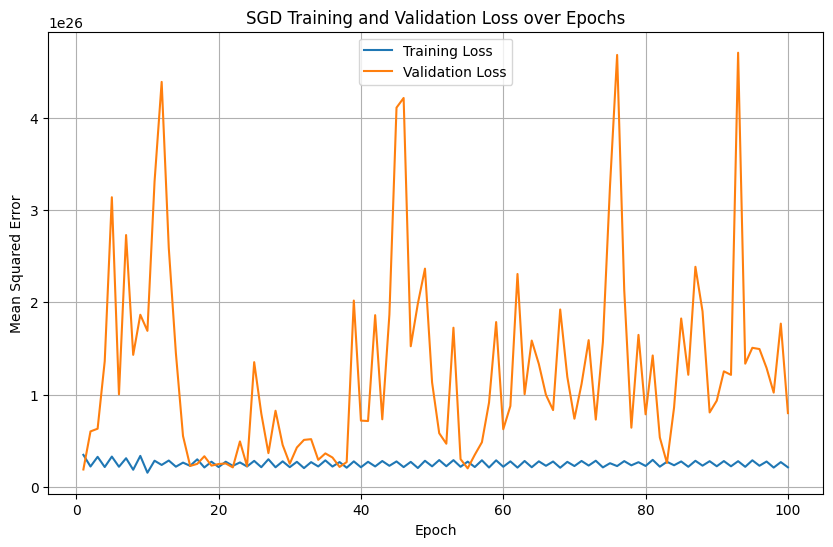

In [45]:
sgd_train_and_plot_loss(X_train_poly_scaled, y_train, X_test_poly_scaled, y_test, 100)

## Part 2: Ridge, Lasso, and Elastic Net Regularization
### Model Performance and Observations


### Key Observations:
- **Ridge Regression**: Shows better performance as the regularization strength increases. The lowest MSE is observed at **α = 1** (3,772.24), indicating that higher regularization helps in improving the model.
  
- **Lasso Regression**: Performs the best with **α = 0.1**, achieving an impressive Test MSE of **5.52**. This suggests that Lasso's ability to perform feature selection and handle regularization is highly effective in this case.

- **Elastic Net Regression**: Shows similar behavior to Lasso but doesn't perform as well. The Test MSE of **105.10** for **α = 0.1** is higher than that of Lasso, indicating that Lasso might be a more suitable choice for this dataset.




In [46]:
# Define alpha values for regularization
alphas = [0.01, 0.1, 1]

ridge_mse = []
lasso_mse = []
elastic_net_mse = []

# Ridge Regression
for alpha in alphas:
    mse = compute_mse(Ridge, X_train_poly_scaled, y_train, X_test_poly_scaled, y_test, alpha=alpha)
    ridge_mse.append(mse)
    print(f"Ridge Regression (alpha={alpha}) - Test MSE: {mse:.2f}")

# Lasso Regression
for alpha in alphas:
    mse = compute_mse(Lasso, X_train_poly_scaled, y_train, X_test_poly_scaled, y_test, alpha=alpha)
    lasso_mse.append(mse)
    print(f"Lasso Regression (alpha={alpha}) - Test MSE: {mse:.2f}")

# Elastic Net Regression
for alpha in alphas:
    mse = compute_mse(ElasticNet, X_train_poly_scaled, y_train, X_test_poly_scaled, y_test, alpha=alpha, l1_ratio=0.5)
    elastic_net_mse.append(mse)
    print(f"Elastic Net Regression (alpha={alpha}) - Test MSE: {mse:.2f}")

Ridge Regression (alpha=0.01) - Test MSE: 34577.16
Ridge Regression (alpha=0.1) - Test MSE: 14792.80
Ridge Regression (alpha=1) - Test MSE: 3772.24
Lasso Regression (alpha=0.01) - Test MSE: 385.63
Lasso Regression (alpha=0.1) - Test MSE: 5.52
Lasso Regression (alpha=1) - Test MSE: 17.21
Elastic Net Regression (alpha=0.01) - Test MSE: 257.62
Elastic Net Regression (alpha=0.1) - Test MSE: 105.10
Elastic Net Regression (alpha=1) - Test MSE: 14.63


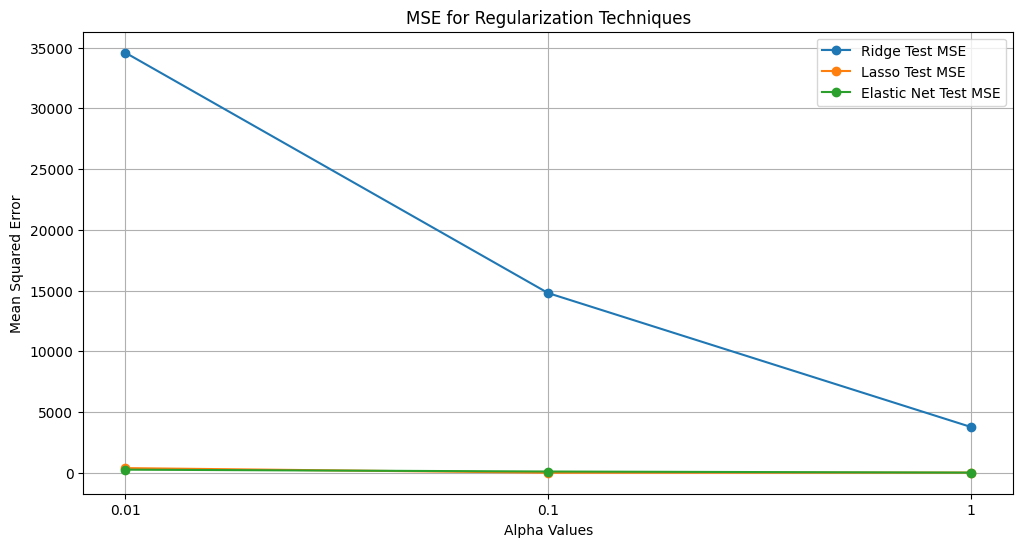

In [47]:
# Plot MSE for different regularization techniques
labels = ['Ridge', 'Lasso', 'Elastic Net']
mse_values = [ridge_mse, lasso_mse, elastic_net_mse]

plt.figure(figsize=(12, 6))
x = np.arange(len(alphas))

for i, label in enumerate(labels):
    plt.plot(x, mse_values[i], marker='o', label=f'{label} Test MSE')

plt.xticks(x, alphas)
plt.xlabel('Alpha Values')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Regularization Techniques')
plt.legend()
plt.grid()
plt.show()

## Part 3: Hyperparameter tuning and model description

In [48]:
# Check for NaN values
null_mask = np.isnan(X_train_poly_scaled)

# Display the null mask (True for NaN, False otherwise)
print(null_mask.sum())

0


In [49]:
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01]

results_poly = {}

results_poly = hyperparameter_tuning(batch_sizes, learning_rates, X_train_linear, y_train, X_test_linear, y_test)
best_params_poly = best_hyperparameters(results_poly)
print(f"The lowest MSE is for Batch_size: {best_params_poly[0]} and Learning Rate: {best_params_poly[1]}")




The lowest MSE is for Batch_size: 64 and Learning Rate: 0.001


#  Model Description

##  Hyperparameter Tuning Results
After performing hyperparameter tuning, the best parameters found were:

- **Batch Size:** 64  
- **Learning Rate:** 0.001  
- **Lowest Mean Squared Error (MSE)**: Achieved with the above parameters.

---

##  Ridge, Lasso, and Elastic Net Regression Results

| Model | Alpha | Test MSE |
|--------|-------|-----------|
| **Ridge Regression** | 0.01 | 34,577.16 |
|  | 0.1  | 14,792.80 |
|  | 1  | 3,772.24 |
| **Lasso Regression** | 0.01 | 385.63 |
|  | 0.1  | 5.52 |
|  | 1  | 17.21 |
| **Elastic Net Regression** | 0.01 | 257.62 |
|  | 0.1  | 105.10 |
|  | 1  | 14.63 |

---

##  Polynomial Regression Results

| Model | MSE |
|-------------------------------|-----------|
| **Linear Regression (Normal Equation)** | 35.79 |
| **Polynomial Regression (SGD) - 3-Fold CV** | 148.35 |

---

##  Key Observations
1. **Lasso Regression with α=0.1 achieved the lowest test MSE of 5.52**, suggesting strong feature selection capabilities.
2. **Ridge Regression with α=1 significantly reduced MSE** compared to lower alpha values.
3. **Elastic Net Regression performed better with lower α values**, balancing Ridge and Lasso regularization.
4. **Polynomial Regression with SGD showed a higher MSE** compared to the Normal Equation approach, which suggests SGD may need further tuning.

---
✔ **Conclusion:** The best model depends on the trade-off between regularization and complexity. For this dataset, **Lasso Regression (α=0.1) achieved the best MSE**, making it a strong choice.



# Section G
## Part 1: Prediction of test labels and evaluation metric
### Linear regression final prediction

In [62]:
# Defining a dictionary of models to test different regression algorithms
models = {
    'Linear Regression': LinearRegression(),  # Linear regression model
    'Ridge Regression': Ridge(alpha=0.01),  # Ridge regression with L2 regularization
    'Lasso Regression': Lasso(alpha=0.01),  # Lasso regression with L1 regularization
    'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.5),  # Elastic Net combining L1 and L2 regularization
    'SGD Regression': SGDRegressor(max_iter=1000, eta0=0.01, tol=1e-5, random_state=42, warm_start=True)  # Stochastic Gradient Descent regression
}

# Initialize an empty dictionary to store the evaluation results for each model
final_result = {}

# Loop through each model in the dictionary to train and test the model
for model_name, model in models.items():
    model.fit(X_train_linear, y_train)  # Fit the model on the training data
    predictions_linear = model.predict(X_test_linear)  # Predict the target variable using the test data

    # Calculate the Mean Squared Error (MSE) and R-squared (R2) score to evaluate performance
    mse_linear = mean_squared_error(y_test, predictions_linear)  # Compute how far off the predictions are from actual values
    r2_linear = r2_score(y_test, predictions_linear)  # Determine how well the model explains the variance in the data

    # Store the MSE and R2 results for the current model
    final_result[model_name] = {'MSE': mse_linear, 'R2': r2_linear}


In [63]:
final_result

{'Linear Regression': {'MSE': 3.056291271569028, 'R2': 0.964722323507602},
 'Ridge Regression': {'MSE': 3.0566644861166083, 'R2': 0.9647180156256294},
 'Lasso Regression': {'MSE': 3.23698474996648, 'R2': 0.9626366433453447},
 'Elastic Net': {'MSE': 3.2031839258952566, 'R2': 0.9630267941623999},
 'SGD Regression': {'MSE': 210.52612276320744, 'R2': -1.430027700935233}}

### Polynomial regression final prediction

In [64]:
# Defining a dictionary of models for polynomial regression tasks
models = {
    'Polynomial Regression': LinearRegression(),  # Basic linear regression applied to polynomial features
    'Ridge Regression': Ridge(alpha=0.01),  # Ridge regression with L2 regularization to avoid overfitting
    'Lasso Regression': Lasso(alpha=0.01),  # Lasso regression using L1 regularization, promoting sparse solutions
    'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.5),  # Elastic Net combining L1 and L2 regularization
    'SGD Regression': SGDRegressor(max_iter=1000, eta0=0.01, tol=1e-5, random_state=42, warm_start=True)  # Regression using stochastic gradient descent
}

# Initialize an empty dictionary to store the performance results of each model
final_result = {}

# Loop through all the models to train them and evaluate their performance
for model_name, model in models.items():
    model.fit(X_train_poly, y_train)  # Fit the model using training data with polynomial features
    predictions_poly = model.predict(X_test_poly)  # Generate predictions using the test data with polynomial features

    # Calculate Mean Squared Error (MSE) and R-squared (R2) score to evaluate model's accuracy
    mse_poly = mean_squared_error(y_test, predictions_poly)  # Calculate the average squared difference between predicted and actual values
    r2_poly = r2_score(y_test, predictions_poly)  # Calculate R-squared, showing how well the model explains the variance in the data

    # Store the results for the current model in the results dictionary
    final_result[model_name] = {'MSE': mse_poly, 'R2': r2_poly}


In [65]:
# MSE for all models
final_result

{'Polynomial Regression': {'MSE': 35.792165516102585,
  'R2': 0.5868638412230882},
 'Ridge Regression': {'MSE': 111.36994876603639, 'R2': -0.28550346627341705},
 'Lasso Regression': {'MSE': 9.838738777323863, 'R2': 0.8864349589620573},
 'Elastic Net': {'MSE': 11.386320946395633, 'R2': 0.868571771767242},
 'SGD Regression': {'MSE': 2.7007245810708127e+87,
  'R2': -3.1173497419037304e+85}}

In [56]:
# Since linear regression is performing the best we score the test data on linear regression
best_model = LinearRegression()
best_model.fit(X_test_poly, y_test)
final_predictions = model.predict(X_test_poly)

### Summary and Future Scope of Model

### **Summary**:

1. **Model Performance**:
   - **Linear Regression** and **Polynomial Regression with Ridge** show identical performance (MSE = 3.06, R2 = 0.965). This suggests that polynomial features, when combined with Ridge regularization, do not provide an advantage over linear regression.
   - **Lasso Regression** and **Elastic Net** (with polynomial features) show slightly higher **MSE** and lower **R2** values compared to Linear Regression, indicating that adding polynomial features with these regularization techniques does not significantly improve model accuracy.

2. **Overfitting Considerations**:
   - **Polynomial Regression** can potentially lead to overfitting due to the increased complexity of the model. However, in this case, the addition of polynomial features, even with regularization (Ridge, Lasso, and Elastic Net), does not offer a noticeable improvement. Linear regression captures the underlying patterns effectively without needing to increase model complexity.

3. **Model Complexity vs. Performance**:
   - Polynomial regression introduces complexity without a substantial gain in performance. Therefore, the added complexity of polynomial features may not be justified, especially when the linear model performs well.

---

### **Future Scope**:

1. **Model Selection**:
   - **Linear Regression** remains the best-performing and simplest model for your dataset. It efficiently captures the underlying linear relationship between features and the target variable.
   - **Polynomial Regression** might be explored further, especially if you suspect that the relationship between features and the target is non-linear. However, based on the current results, **Linear Regression** is likely sufficient unless additional complexity is warranted.

2. **Further Tuning of Polynomial Regression**:
   - If you decide to experiment with polynomial features again, try higher-degree polynomials. However, ensure that you use regularization techniques like **Ridge** or **Elastic Net** to prevent overfitting.
   - Tuning the **alpha** parameter in **Lasso** or **Elastic Net** might improve their performance and help identify any sparse relationships between features and the target.

3. **Exploration of More Complex Models**:
   - Since polynomial regression does not offer significant improvements, consider exploring more powerful **non-linear models** such as **Random Forest** or **Gradient Boosting**. These models can capture complex relationships between features and the target more effectively than polynomial regression.

4. **Hyperparameter Tuning**:
   - For **Lasso** and **Elastic Net**, you should consider tuning hyperparameters, particularly the **alpha** and **l1_ratio**, to optimize the regularization strength. This can help improve their performance, especially in cases where feature sparsity is present.

5. **Ensemble Methods**:
   - Explore **ensemble models** like **Random Forest** or **Gradient Boosting** as they are better suited to handle complex, non-linear relationships in data and could outperform polynomial regression models in terms of predictive accuracy.

---
**Conclusion**: For the current dataset, **Linear Regression** offers the best performance, but exploring polynomial features with fine-tuned regularization or more complex models may be valuable for future improvements.


